<a href="https://colab.research.google.com/github/Arvinth-s/Dark-Sight/blob/master/DarkSight_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#OM NAMO NARAYANA

In [5]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
dataset_dir = '/content/drive/My Drive/Dataset/Dataset/'
os.chdir(dataset_dir)

In [120]:
subdirs=[]
for path, sd, files in os.walk(dataset_dir):
    if(sd != []):
      subdirs.append(sd)
subdirs=subdirs[0]
A=[]
for subdir in subdirs:
  a = list(os.listdir(subdir))
  a.sort()
  if(len(a)==10):
    a.append(subdir)
    A.append(a)
A = np.array(A)
longExposure=[]
shortExposure=[]
temperature=[]
longExposure = [dataset_dir + a[10] + "/" + a[4] for a in A]
shortExposure =[dataset_dir + a[10] + "/" +a[5] for a in A]
temperature = [dataset_dir + a[10] + "/" +a[6] for a in A]
print(shortExposure)

['/content/drive/My Drive/Dataset/Dataset/2020-02-25 00-58-10Cannon200DShots/2020-02-25 00-58-40small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 01-04-24Cannon200DShots/2020-02-25 01-04-26small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 01-06-00Cannon200DShots/2020-02-25 01-06-03small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 01-01-03Cannon200DShots/2020-02-25 01-01-07small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 00-59-54Cannon200DShots/2020-02-25 01-00-00small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 01-03-05Cannon200DShots/2020-02-25 01-03-07small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 00-50-20Cannon200DShots/2020-02-25 00-50-26small_shortCannon200DShots.JPG', '/content/drive/My Drive/Dataset/Dataset/2020-02-25 00-54-41Cannon200DShots/2020-02-25 00-54-43small_sh

In [121]:
# imports
import torch
import torchvision.transforms as transforms
import glob
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import time
import albumentations as A
 
from torch.utils.data import DataLoader, Dataset
from PIL import Image

In [122]:
# define pytorch transforms
transform = transforms.Compose([
     transforms.ToPILImage(),
     transforms.Resize((300, 300)),
     transforms.CenterCrop((100, 100)),
     transforms.RandomCrop((80, 80)),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomRotation(degrees=(-90, 90)),
     transforms.RandomVerticalFlip(p=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     ])

In [127]:
# PyTorch image augmentation module
image_list=longExposure
class PyTorchImageDataset(Dataset):
    def __init__(self, image_list, transforms=None):
        self.image_list = image_list
        self.transforms = transforms
         
    def __len__(self):
        return (len(self.image_list))
    
    def __getitem__(self, i):
        image = plt.imread(self.image_list[i])
        image = Image.fromarray(image).convert('RGB')        
        image = np.asarray(image).astype(np.uint8)
        if self.transforms is not None:
            image = self.transforms(image)
            
        return torch.tensor(image, dtype=torch.float)

In [128]:
pytorch_dataset = PyTorchImageDataset(image_list=image_list, transforms=transform)
pytorch_dataloader = DataLoader(dataset=pytorch_dataset, batch_size=16, shuffle=True)

In [129]:
def show_img(img):
    plt.figure(figsize=(18,15))
    # unnormalize
    img = img / 2 + 0.5  
    npimg = img.numpy()
    npimg = np.clip(npimg, 0., 1.)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

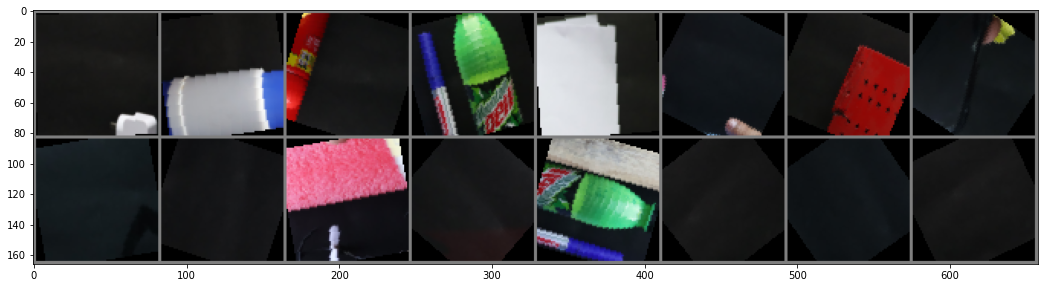

In [130]:
data = iter(pytorch_dataloader)
images = data.next()
 
# show images
show_img(torchvision.utils.make_grid(images))